In [1]:
import numpy as np
import pandas as pd
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

%matplotlib inline

/Users/victorlandeau/Library/Caches/pypoetry/virtualenvs/data-dojo-HwXTP4EJ-py3.7/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# Récupération des données

In [2]:
wine_data = pd.read_csv("wines.csv")

In [3]:
wine_data.head()

,flavanoids,alcohol,wine_class
0,2.65,13.05,1
1,2.29,12.08,1
2,3.24,13.16,0
3,0.76,13.32,2
4,1.57,13.50,2


In [4]:
flavanoids_column_name = "flavanoids"
alcohol_column_name = "alcohol"
target_column_name = "wine_class"

In [5]:
features = wine_data.drop(target_column_name, axis=1)
target = wine_data[target_column_name]

In [6]:
trace_wines_type_0 = go.Scatter(
    x=wine_data.loc[target == 0, flavanoids_column_name].tolist(),
    y=wine_data.loc[target == 0, alcohol_column_name],
    name='Type 0',
    mode='markers',
    marker=dict(
        size=10,
        color='rgba(12, 0, 152, .8)',
        line=dict(
            width=2,
            color='rgb(0, 0, 0)'
        )
    )
)

trace_wines_type_1 = go.Scatter(
    x=wine_data.loc[target == 1, flavanoids_column_name],
    y=wine_data.loc[target == 1, alcohol_column_name],
    name='Type 1',
    mode='markers',
    marker=dict(
        size=10,
        color='rgba(0, 152, 0, .8)',
        line=dict(
            width=2,
            color='rgb(0, 0, 0)'
        )
    )
)

trace_wine_types_2 = go.Scatter(
    x=wine_data.loc[target == 2, flavanoids_column_name],
    y=wine_data.loc[target == 2, alcohol_column_name],
    name='Type 2',
    mode='markers',
    marker=dict(
        size=10,
        color='rgba(152, 0, 0, .8)',
        line=dict(
            width=2,
            color='rgb(0, 0, 0)'
        )
    )
)

trace_unknown_wines = go.Scatter(
    x=[1.8, 0.7, 3.1],
    y=[13.2, 12.0, 12.7],
    name="Inconnus",
    mode="markers",
    marker=dict(
        size=10,
        color='rgba(0, 0, 0, 0.15)',
        line=dict(width=2, )
    )
)

layout = dict(title='Vins',
              xaxis=dict(title=flavanoids_column_name),
              yaxis=dict(title=alcohol_column_name)
              )

data = [trace_wines_type_0, trace_wines_type_1, trace_wine_types_2, trace_unknown_wines]

iplot({"data": data, "layout": layout}, filename=None)

# Arbre de décision

In [7]:
decision_tree = DecisionTreeClassifier(max_depth=2)
decision_tree.fit(features, target)

DecisionTreeClassifier(max_depth=2)

In [24]:
unknown_wine_data = [[2.4, 13.2]]
unknown_wine_predicted_class = decision_tree.predict(unknown_wine_data)[0]
unknown_wine_predicted_class

0

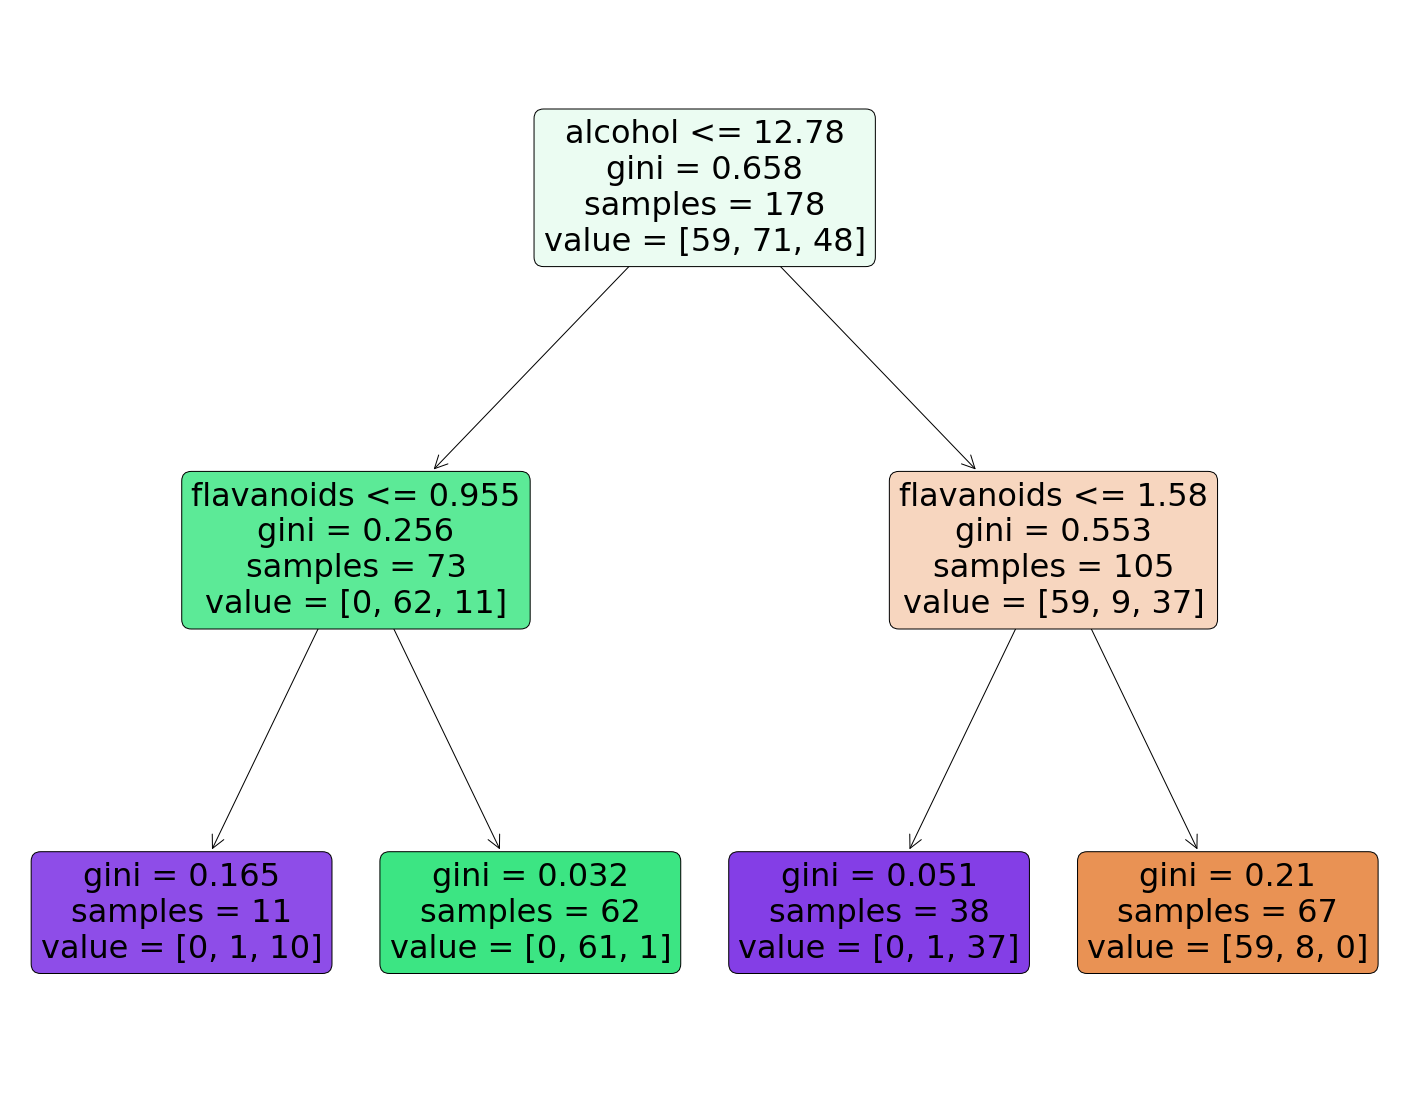

In [16]:
fig = plt.figure(figsize=(25, 20))
plot_tree(decision_tree,
          feature_names=features.columns,
          filled=True, rounded=True
          );

# Frontières de décision

In [17]:
x_min, x_max = wine_data[flavanoids_column_name].min() - 1, wine_data[flavanoids_column_name].max() + 1
y_min, y_max = wine_data[alcohol_column_name].min() - 1, wine_data[alcohol_column_name].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
y_ = np.arange(y_min, y_max, 0.1)
predictions = decision_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

trace_wines_type_0 = go.Scatter(
    x=wine_data.loc[target == 0, flavanoids_column_name],
    y=wine_data.loc[target == 0, alcohol_column_name],
    name='Type 0',
    mode='markers',
    marker=dict(
        size=10,
        color='rgba(0, 0, 152, .8)',
        line=dict(
            width=2,
            color='rgb(0, 0, 0)'
        )
    )
)

trace_wines_type_1 = go.Scatter(
    x=wine_data.loc[target == 1, flavanoids_column_name],
    y=wine_data.loc[target == 1, alcohol_column_name],
    name='Type 1',
    mode='markers',
    marker=dict(
        size=10,
        color='rgba(0, 152, 0, .8)',
        line=dict(
            width=2,
            color='rgb(0, 0, 0)'
        )
    )
)

trace_wine_types_2 = go.Scatter(
    x=wine_data.loc[target == 2, flavanoids_column_name],
    y=wine_data.loc[target == 2, alcohol_column_name],
    name='Type 2',
    mode='markers',
    marker=dict(
        size=10,
        color='rgba(152, 0, 0, .8)',
        line=dict(
            width=2,
            color='rgb(0, 0, 0)'
        )
    )
)

contour = go.Contour(
    x=xx[0], y=y_,
    z=predictions,
    colorscale=[[0, 'blue'],
                [1, 'yellow'],
                [2, 'red']
                ],
    opacity=0.5,
    showscale=False
)

trace_unknown_wines = go.Scatter(
    x=[3.5, 2.4],
    y=[12.1, 13.2],
    name="Inconnus",
    mode="markers",
    marker=dict(
        size=10,
        color='rgba(0, 0, 0, 0.15)',
        line=dict(width=2, )
    )
)

data = [trace_wines_type_0, trace_wines_type_1, trace_wine_types_2, contour, trace_unknown_wines]

layout = dict(title='Vins',
              xaxis=dict(title=flavanoids_column_name),
              yaxis=dict(title=alcohol_column_name)
              )

iplot({"data": data, "layout": layout}, filename=None)